# Group

Christine Pham, Hayden Bustos, Rachel Le,
John Aguinaga, Bavithra Lakshmanasamy


# Group Goals:

PP of info provided by Christine: https://docs.google.com/presentation/d/1RB_bogdjHD3oel6amCKc5Z6DCruBj3huyQY6SfzXJWU/edit#slide=id.g2c02fc17bb5_0_59

- Predict depth of pycnocline
  - The boundary separating two liquid layers of different densities (strong density gradient)
  - Planning to predict the depth at which that boundary is
  - Planning to look at square blocks (longitude and latitude coordinates) and predicting depth of change within that block


# CalCOFI Dataset (kaggle)

https://www.kaggle.com/datasets/sohier/calcofi?resource=download

- California Cooperative Oceanic Fisheries Investigations
- Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.

Info from CalCOFI website:

https://calcofi.org/data/oceanographic-data/bottle-database/ (there is a table that describes/defines all the columns if you scroll down)

- The Cast table contains metadata. This table includes date, time, latitude, longitude, weather, etc. for each CTD cast ever completed on a CalCOFI cruise. Each row is a unique cast, numbered sequentially/indexed by the "Cst_Cnt" column.
- The Bottle table contains oceanographic data. This table includes oceanographic measurements for each bottle/sampling depth ever completed on a CalCOFI cruise. There are additional data code and precision columns describing the quality of each oceanographic measurement. Each row is a unique bottle/sampling depth, numbered sequentially/indexed by the "Btl_Cnt" column.
- Bottle table is much larger than the Cast table because each cast can have up to 24 bottles/sampling depths.

- The Bottle table also has a “Cst_Cnt” column, which can be used as a unifier between the two tables.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing datset
bottle=pd.read_csv('bottle.csv')
cast=pd.read_csv('cast.csv')
#Note: issue with mixed types

<ipython-input-39-30f22cc35f22>:2: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  bottle=pd.read_csv('bottle.csv')
<ipython-input-39-30f22cc35f22>:3: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  cast=pd.read_csv('cast.csv')


In [ ]:
#dimensions
print(bottle.shape)
print(cast.shape)

(864863, 74)
(34404, 61)


In [ ]:
#types
bottle_types=bottle.dtypes
cast_types=cast.dtypes
print(bottle_types)
print()
print(cast_types)

Cst_Cnt                  int64
Btl_Cnt                  int64
Sta_ID                  object
Depth_ID                object
Depthm                 float64
                        ...   
TA1                    float64
TA2                    float64
pH2                    float64
pH1                    float64
DIC Quality Comment    float64
Length: 74, dtype: object

Cst_Cnt         int64
Cruise_ID      object
Cruise          int64
Cruz_Sta        int64
DbSta_ID        int64
               ...   
Wet_T         float64
Wea           float64
Cloud_Typ     float64
Cloud_Amt     float64
Visibility    float64
Length: 61, dtype: object


In [ ]:
bottle.info(verbose=True)

#Notes: 'IncTim' = Elapsed Incubation Time; listed as object, need to take a look at and convert

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155636 entries, 0 to 155635
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              155636 non-null  int64  
 1   Btl_Cnt              155636 non-null  int64  
 2   Sta_ID               155636 non-null  object 
 3   Depth_ID             155636 non-null  object 
 4   Depthm               155635 non-null  float64
 5   T_degC               151024 non-null  float64
 6   Salnty               123085 non-null  float64
 7   O2ml_L               133105 non-null  float64
 8   STheta               120570 non-null  float64
 9   O2Sat                106826 non-null  float64
 10  Oxy_µmol/Kg          106826 non-null  float64
 11  BtlNum               0 non-null       float64
 12  RecInd               155635 non-null  float64
 13  T_prec               151024 non-null  float64
 14  T_qual               4822 non-null    float64
 15  S_prec           

In [ ]:
cast.info(verbose=True)

#Notes: A lot more object types, need to take a look and consider if conversion is necessary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      34404 non-null  int64  
 1   Cruise_ID    34404 non-null  object 
 2   Cruise       34404 non-null  int64  
 3   Cruz_Sta     34404 non-null  int64  
 4   DbSta_ID     34404 non-null  int64  
 5   Cast_ID      34404 non-null  object 
 6   Sta_ID       34404 non-null  object 
 7   Quarter      34404 non-null  int64  
 8   Sta_Code     34404 non-null  object 
 9   Distance     19714 non-null  float64
 10  Date         34404 non-null  object 
 11  Year         34404 non-null  int64  
 12  Month        34404 non-null  int64  
 13  Julian_Date  34404 non-null  int64  
 14  Julian_Day   34404 non-null  int64  
 15  Time         34080 non-null  object 
 16  Lat_Dec      34404 non-null  float64
 17  Lat_Deg      34404 non-null  int64  
 18  Lat_Min      34404 non-null  float64
 19  Lat_

In [ ]:
#column names
print(bottle.columns)
print() #for visual space
print(cast.columns)

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

Index(['Cst_Cnt', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Cast_ID',
       'Sta_ID', 'Quarter', 'Sta_Code', 'Distance', 'Date', 'Year', 'Month',
       'J

In [ ]:
#missing values
bottle_na=bottle.isnull().sum()
cast_na=cast.isnull().sum()
print(bottle_na)
print()
print(cast_na)

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

Cst_Cnt           0
Cruise_ID         0
Cruise            0
Cruz_Sta          0
DbSta_ID          0
              ...  
Wet_T         15415
Wea            7597
Cloud_Typ     24484
Cloud_Amt     22522
Visibility    24897
Length: 61, dtype: int64


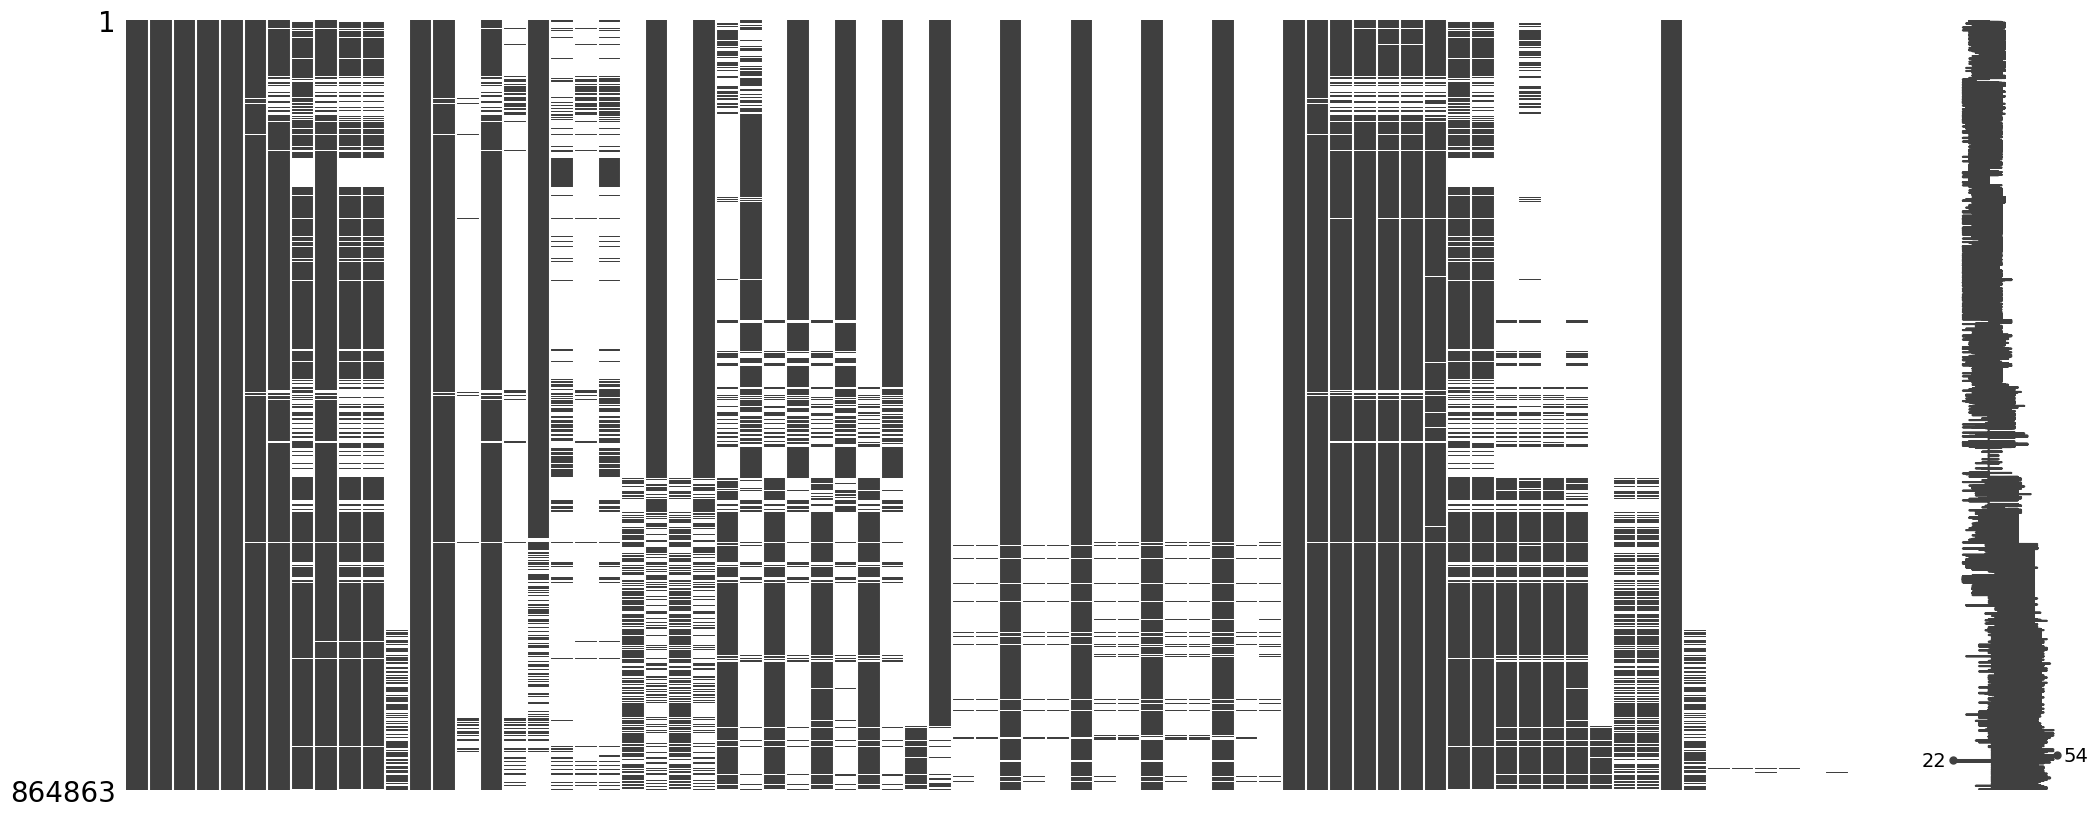

In [ ]:
#Plot the missing data (bottle df)
import missingno as msno

msno.matrix(bottle)
plt.show()

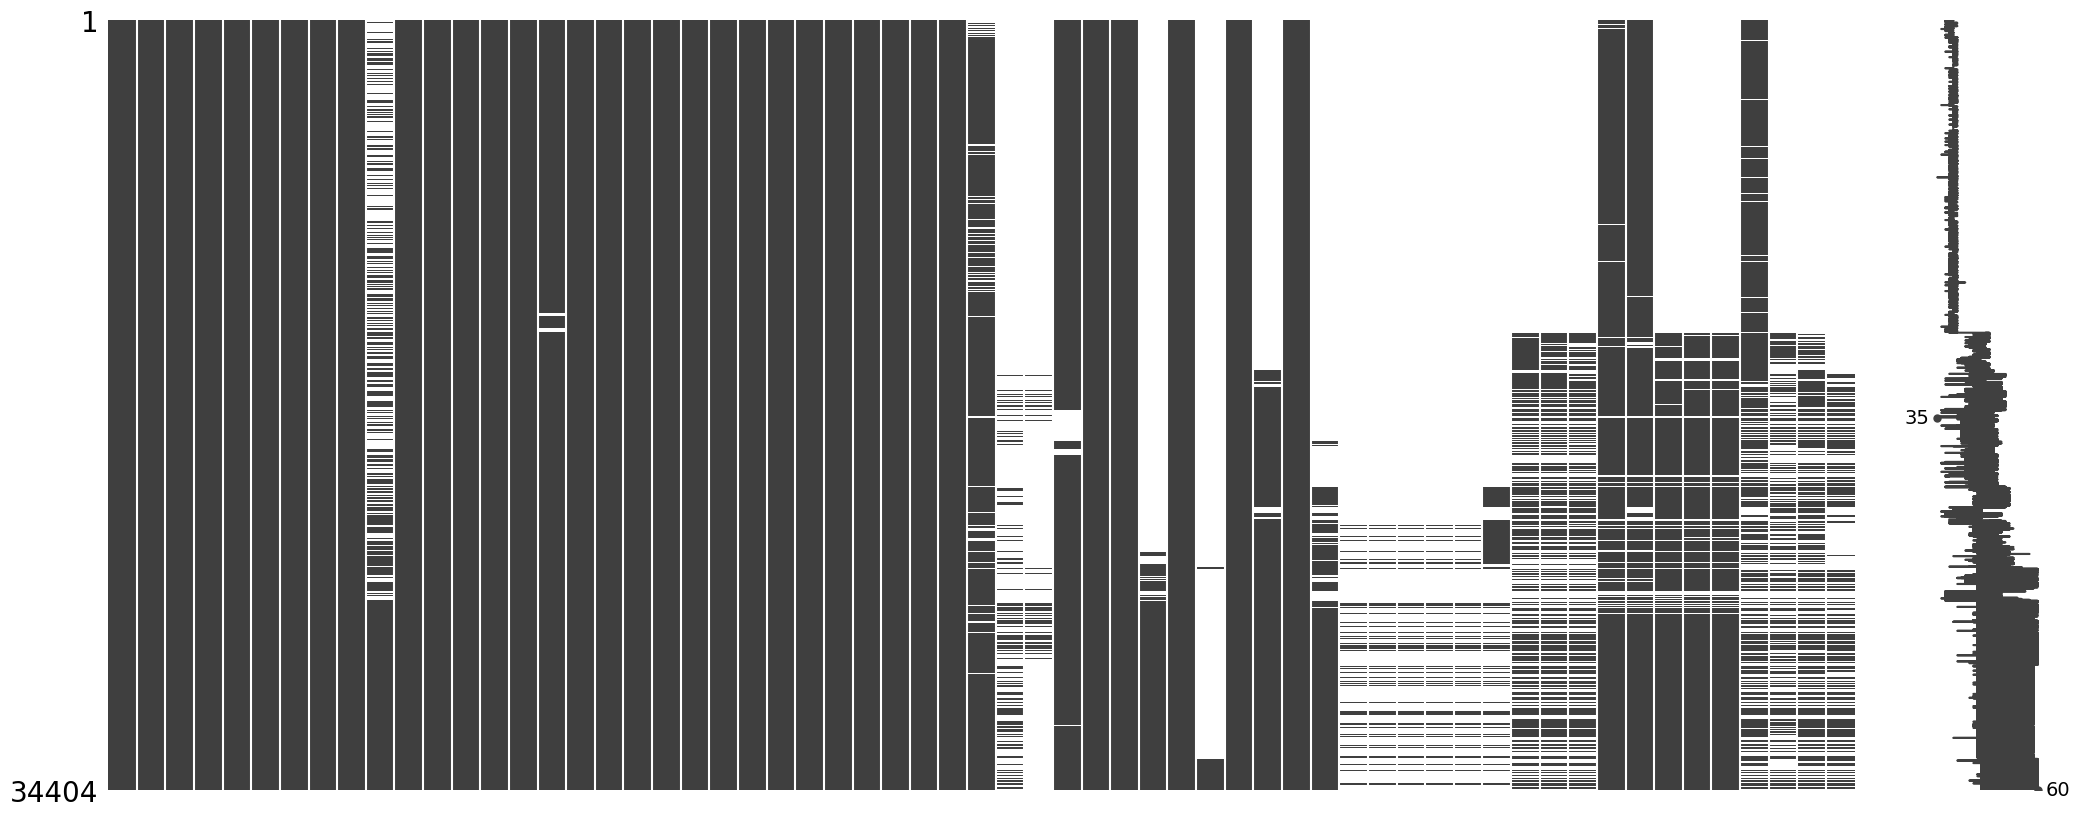

In [ ]:
#Plot the missing data (cast)
import missingno as msno

msno.matrix(cast)
plt.show()

In [ ]:
#duplicates
bottle_dups=bottle.duplicated().sum()
cast_dups=cast.duplicated().sum()
print(bottle_dups)
print(cast_dups)

0
0


# Data Cleaning/ More Data Understanding

- Remove columns with 50% or more missing values
- look at columns with insignificant amount of missing values, decide whether column should be kept or not and impute/remove/deal with missing values
- look at correlation to help with feature selection
- drop id columns and check for duplicates
- make use of boxplots on kept columns to check for outliers; deal with said outliers
- use 'Cst_Cnt' column to unify bottle and cast

In [ ]:
#removing columns (features) from bottle dataset
#iterating through columns of bottle dataset
for col in bottle.columns:
  if bottle[col].isnull().sum()/len(bottle)>0.5: #if number of missing values makes up more than 50%
    bottle.drop(col,axis=1,inplace=True)

bottle.info(verbose=True) #note that there were originally 73; trimmed down to 35

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cst_Cnt      864863 non-null  int64  
 1   Btl_Cnt      864863 non-null  int64  
 2   Sta_ID       864863 non-null  object 
 3   Depth_ID     864863 non-null  object 
 4   Depthm       864863 non-null  int64  
 5   T_degC       853900 non-null  float64
 6   Salnty       817509 non-null  float64
 7   O2ml_L       696201 non-null  float64
 8   STheta       812174 non-null  float64
 9   O2Sat        661274 non-null  float64
 10  Oxy_µmol/Kg  661268 non-null  float64
 11  RecInd       864863 non-null  int64  
 12  T_prec       853900 non-null  float64
 13  S_prec       817509 non-null  float64
 14  P_qual       673755 non-null  float64
 15  Chlqua       639166 non-null  float64
 16  Phaqua       639170 non-null  float64
 17  PO4q         451786 non-null  float64
 18  SiO3qu       510866 non-

In [ ]:
#removing columns (features) from cast dataset
#iterating through columns of cast dataset
for col in cast.columns:
  if cast[col].isnull().sum()/len(cast)>0.5: #if number of missing values makes up more than 50%
    cast.drop(col,axis=1,inplace=True)

cast.info(verbose=True) #note that there were originally 60; trimmed down to 43

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 44 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      34404 non-null  int64  
 1   Cruise_ID    34404 non-null  object 
 2   Cruise       34404 non-null  int64  
 3   Cruz_Sta     34404 non-null  int64  
 4   DbSta_ID     34404 non-null  int64  
 5   Cast_ID      34404 non-null  object 
 6   Sta_ID       34404 non-null  object 
 7   Quarter      34404 non-null  int64  
 8   Sta_Code     34404 non-null  object 
 9   Distance     19714 non-null  float64
 10  Date         34404 non-null  object 
 11  Year         34404 non-null  int64  
 12  Month        34404 non-null  int64  
 13  Julian_Date  34404 non-null  int64  
 14  Julian_Day   34404 non-null  int64  
 15  Time         34080 non-null  object 
 16  Lat_Dec      34404 non-null  float64
 17  Lat_Deg      34404 non-null  int64  
 18  Lat_Min      34404 non-null  float64
 19  Lat_

## Focus on Bottle dataset

- 0 to 3; identifying columns
- checking number of unique values in columns; use to determine if column is viable

In [ ]:
cols=[]
uni_count=[]
uni_perc=[]

#number of unique values for columns
for col in bottle.columns:
  cols.append(col)
  unique=len(bottle[col].unique())
  uni_count.append(unique)
  uni_perc.append(unique/len(bottle)*100)

tb={
    'Columns':cols,
    'Unique Values':uni_count,
    'Unique %':uni_perc
}

tb=pd.DataFrame(tb)
tb.set_index('Columns',inplace=True)
tb

,Unique Values,Unique %
Columns,,
Cst_Cnt,34404,3.977971
Btl_Cnt,864863,100.000000
Sta_ID,2634,0.304557
Depth_ID,864850,99.998497
Depthm,3219,0.372198
T_degC,13848,1.601178
Salnty,14603,1.688476
O2ml_L,6501,0.751680
STheta,36369,4.205175


In [ ]:
#columns to be dropped (quality code columns, precision columns, and record indicator)
#drop those columns by looking at unique values <10
for col in bottle.columns:
  unique=len(bottle[col].unique())
  if unique<10:
    bottle.drop(col,axis=1,inplace=True)

bottle.info(verbose=True) #columns went from 35 to 20

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cst_Cnt      864863 non-null  int64  
 1   Btl_Cnt      864863 non-null  int64  
 2   Sta_ID       864863 non-null  object 
 3   Depth_ID     864863 non-null  object 
 4   Depthm       864863 non-null  int64  
 5   T_degC       853900 non-null  float64
 6   Salnty       817509 non-null  float64
 7   O2ml_L       696201 non-null  float64
 8   STheta       812174 non-null  float64
 9   O2Sat        661274 non-null  float64
 10  Oxy_µmol/Kg  661268 non-null  float64
 11  R_Depth      864863 non-null  float64
 12  R_TEMP       853900 non-null  float64
 13  R_POTEMP     818816 non-null  float64
 14  R_SALINITY   817509 non-null  float64
 15  R_SIGMA      812007 non-null  float64
 16  R_SVA        812092 non-null  float64
 17  R_DYNHT      818206 non-null  float64
 18  R_O2         696201 non-

Note: Dropping the Quality Code columns

- Quality Code columns were dropped because they were by their nature linked to the nutrient columns that were already dropped due to having excessive NA values.

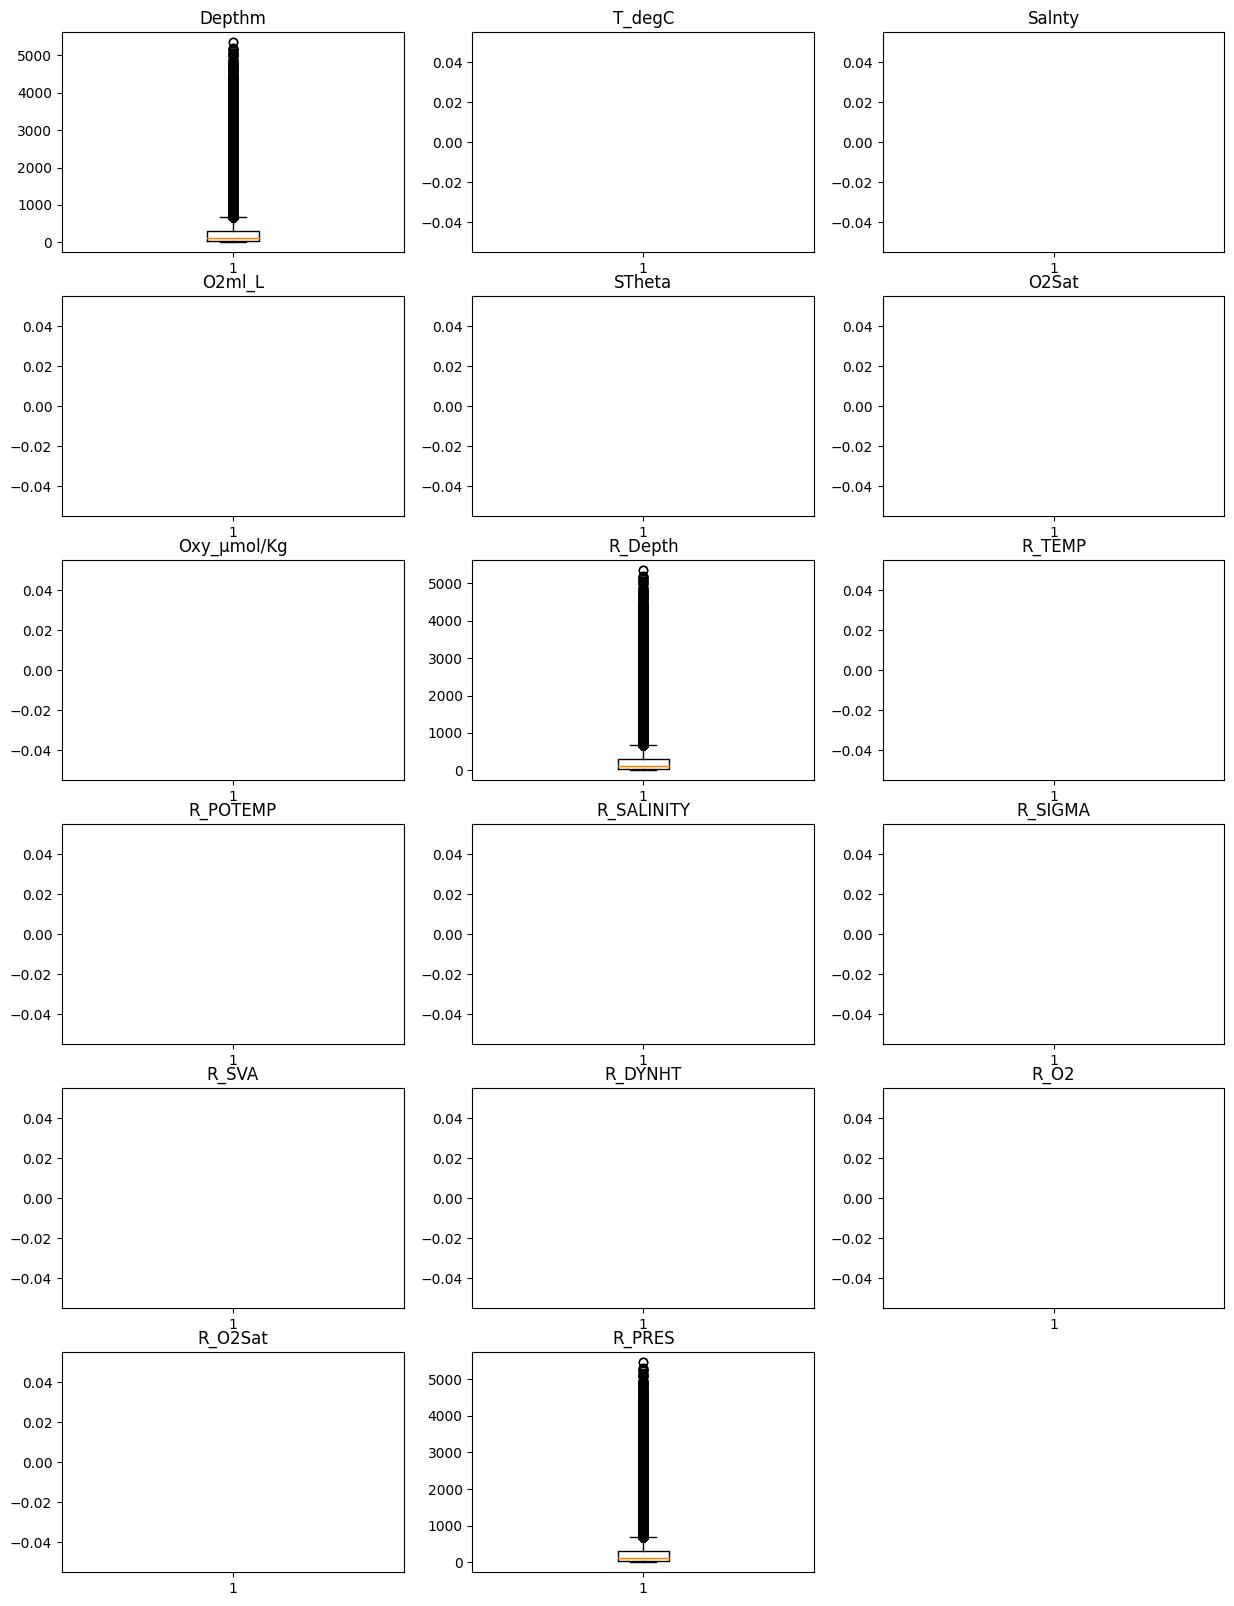

In [ ]:
#boxplots; look at distribution and outliers

#not including identifying columns
num_cols=bottle.iloc[:,4:]
count=1 #counter used for plotting boxplots

#figure size
plt.figure(figsize=(15,20))

#iterating through columns and plotting boxplot
for col in num_cols.columns:
  plt.subplot(6,3,count)
  plt.boxplot(num_cols[col])
  plt.title(col)
  count+=1
plt.show()


Of the boxplots that showed up, the plots show that outliers are in the higher values not lower values. There also appears to be quite a number of outliers.

In [ ]:
#function to count number of outliers in a dataset
def count_outliers(dataset):
  #setup for nice table output
  cols=[]
  out_count=[]
  out_perc=[]

  #iterating through columns to find number of outliers and percentage of outliers
  for col in dataset.columns:
    cols.append(col)
    outlier_count=0
    q1=dataset[col].quantile(0.25)
    q3=dataset[col].quantile(0.74)
    IQR=q3-q1
    lower=q1-(1.5*IQR)
    upper=q3+(1.5*IQR)
    for val in dataset[col]:
      if val<lower or val>upper:
        outlier_count+=1
    out_count.append(outlier_count)
    out_perc.append(outlier_count/len(dataset)*100)

  #creating a nice table of info
  table={
      'Columns':cols,
      'Outliers':out_count,
      'Outliers %':out_perc
  }

  table=pd.DataFrame(table)
  table.set_index('Columns',inplace=True)
  return table

count_outliers(num_cols)

,Outliers,Outliers %
Columns,,
Depthm,54779,6.333836
T_degC,4389,0.507479
Salnty,3044,0.351963
O2ml_L,0,0.000000
STheta,550,0.063594
O2Sat,1,0.000116
Oxy_µmol/Kg,0,0.000000
R_Depth,54779,6.333836
R_TEMP,4389,0.507479


In [ ]:
#Note that Depthm/R_Depth and T_degC/R_TEMP have same number of outliers
#checking if those columns are identical

bottle['Depthm'].equals(bottle['R_Depth']) #not identical, since false was returned

False

In [ ]:
bottle['T_degC'].equals(bottle['R_TEMP'])#not identical, since false was returned

False

In [ ]:
#Function for checking the average difference between measured columns and recorded columns
def avg_diff(col1,col2):
  diffs=[]
  for i in range(len(col1)):
    #skip row if one of the values is NA value
    if col1.isnull().iloc[i] or col2.isnull().iloc[i]:
      continue
    else:
      difference=abs(col1[i]-col2[i])
      diffs.append(difference)
  avg=sum(diffs)/len(diffs)
  return avg


In [ ]:
#checking differences between measured and recorded columns
equiv=[('Depthm','R_Depth'),('T_degC','R_TEMP'),('Salnty','R_SALINITY'),('O2ml_L','R_O2'),('STheta','R_SIGMA'),('O2Sat','R_O2Sat')]
table_cols=['Depthm/R_Depth','T_degC/R_TEMP','Salnty/R_SALINITY','O2ml_L/R_O2','STheta/R_SIGMA','O2Sat/R_O2Sat']
diff_lst=[]
for grp in equiv:
  c1,c2=grp
  avg_=avg_diff(bottle[c1],bottle[c2])
  diff_lst.append(avg_)

#creating a nice table of info
table={
    'Measured/Recorded':table_cols,
    'Average Difference':diff_lst
}

table=pd.DataFrame(table)
table.set_index('Measured/Recorded',inplace=True)
table

,Average Difference
Measured/Recorded,
Depthm/R_Depth,0.000543
T_degC/R_TEMP,0.000099
Salnty/R_SALINITY,0.000067
O2ml_L/R_O2,0.000124
STheta/R_SIGMA,0.004514
O2Sat/R_O2Sat,0.001831


For the measured and recorded columns, the average difference between each set of the columns were all quite small (<|0.005|).

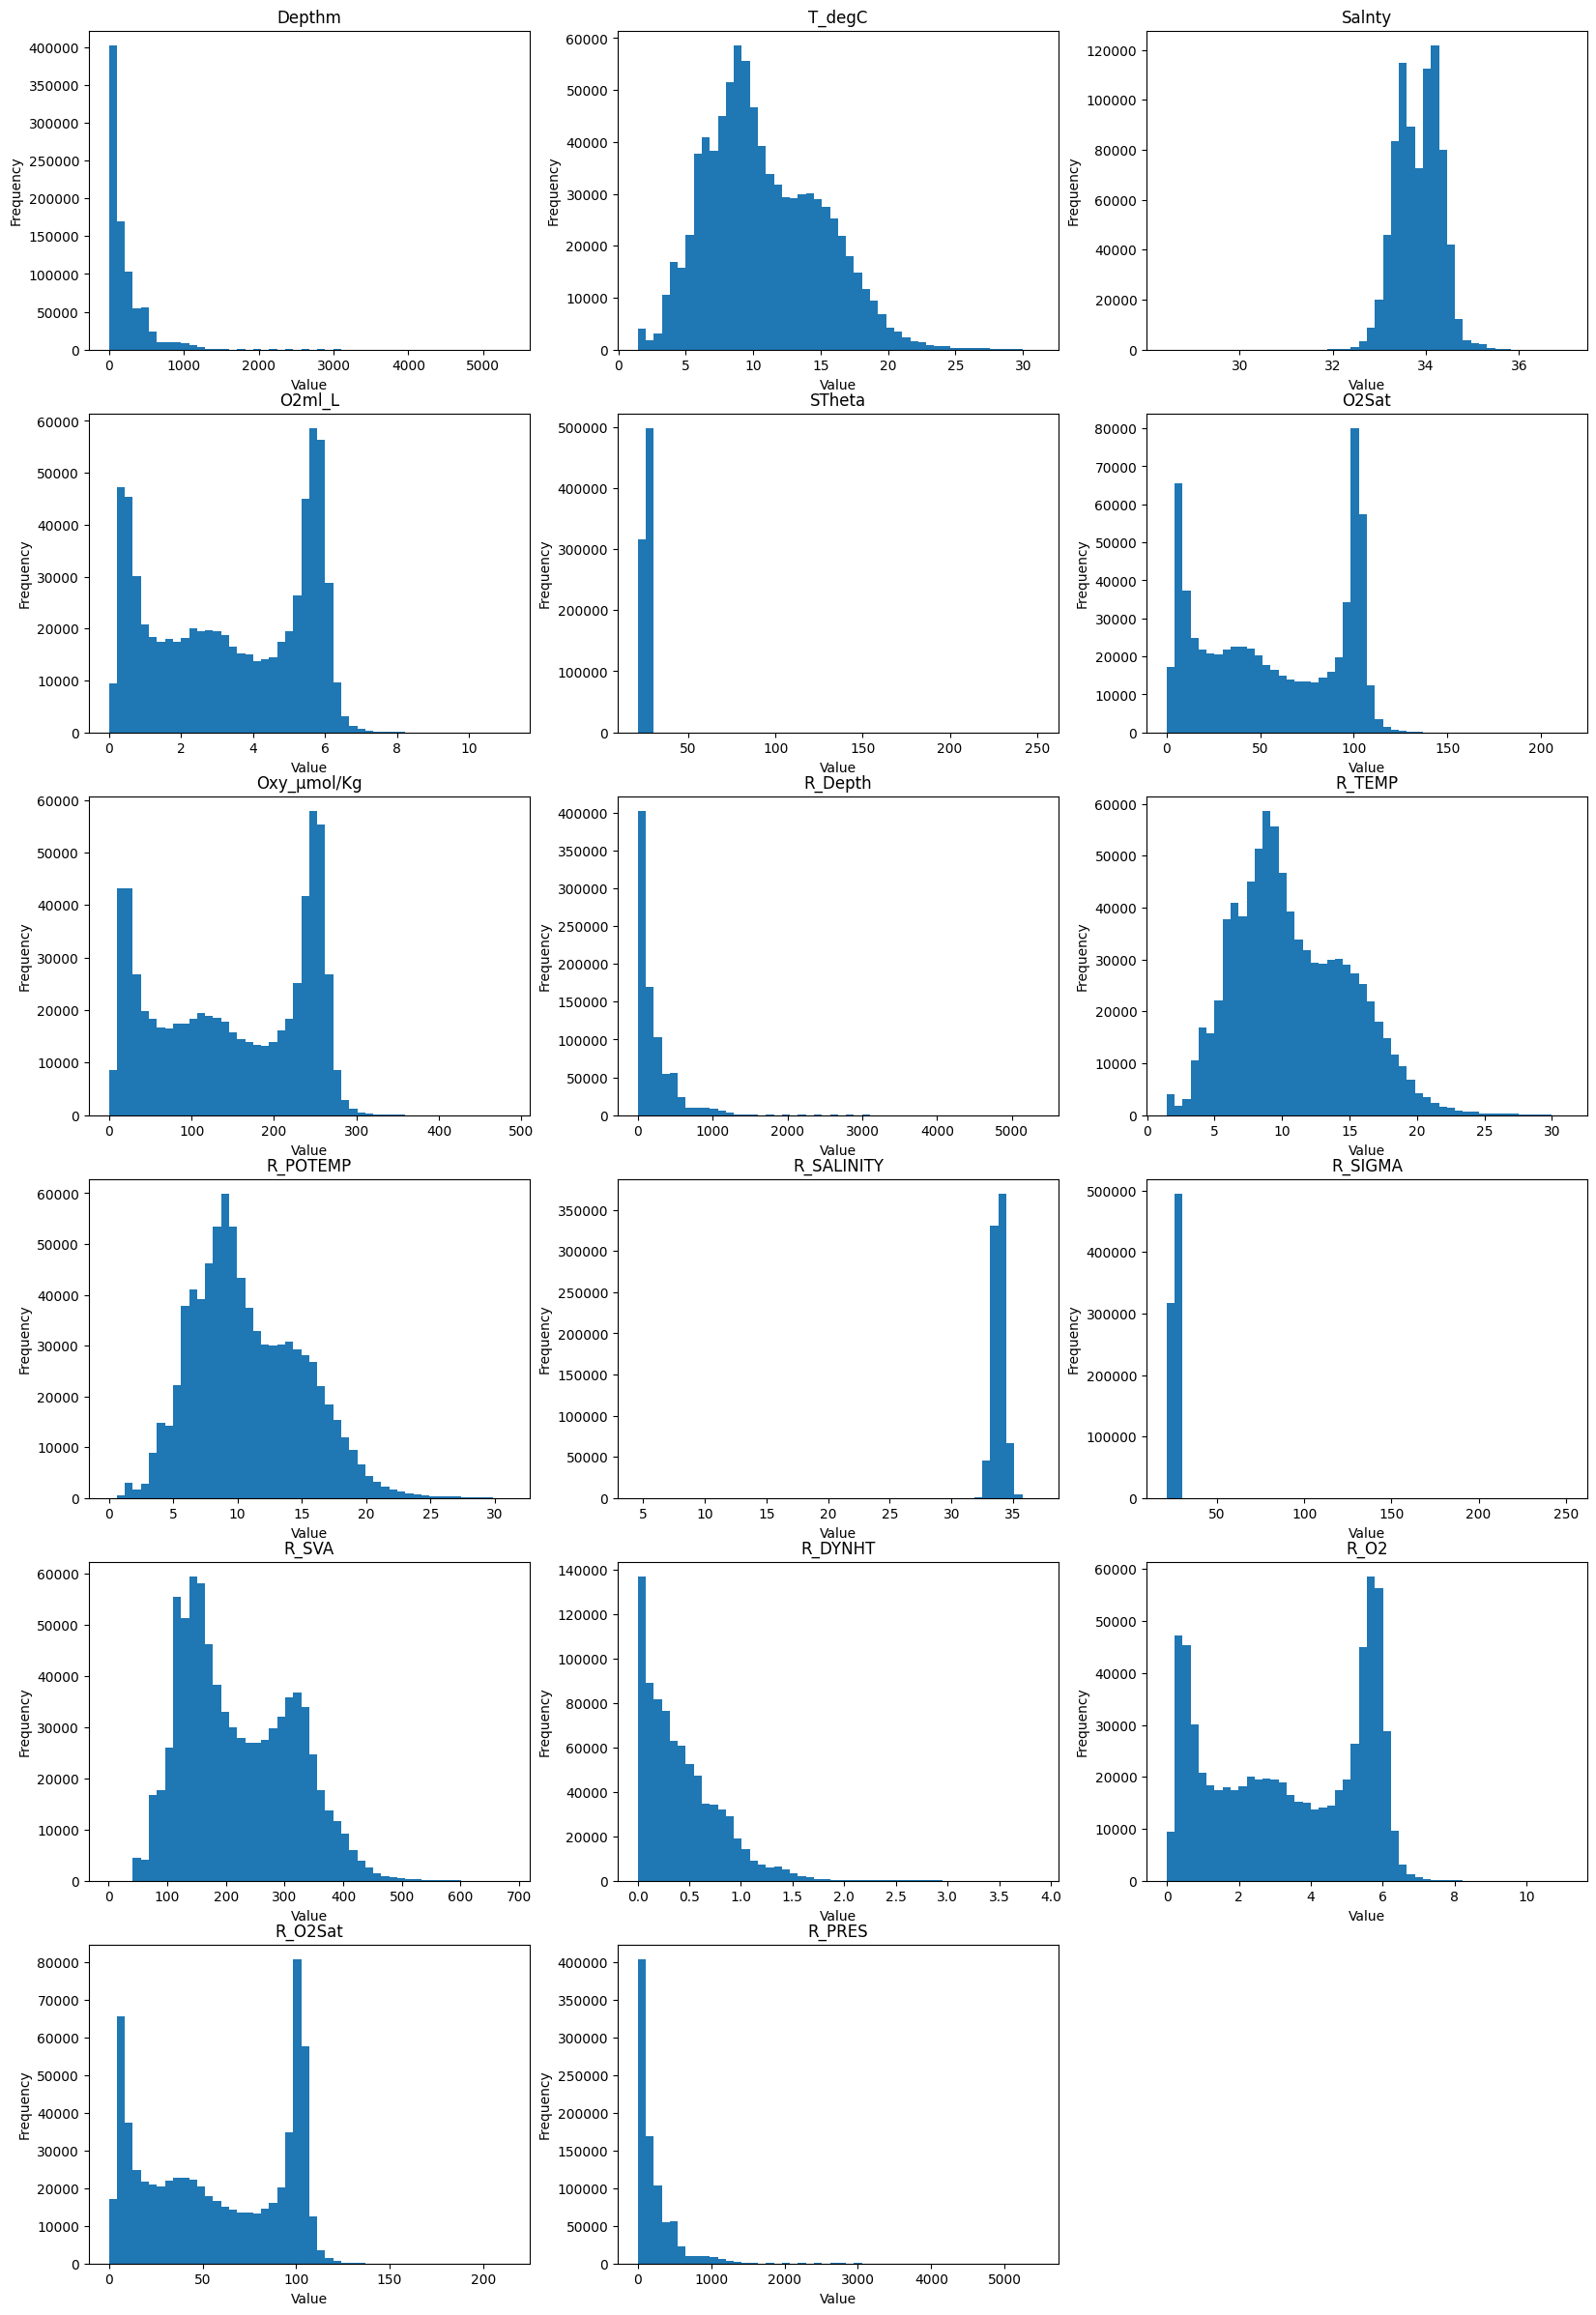

In [ ]:
count=1

#figure size
plt.figure(figsize=(20,30))

#iterating through columns and plotting histograms
for col in num_cols.columns:
  plt.subplot(6,3,count)
  plt.hist(num_cols[col],bins=50)
  plt.title(col)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  count+=1
plt.show()

In [ ]:
#pairplot
sns.pairplot(num_cols)
plt.suptitle('Pairplot of Bottle Numerical Columns')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [ ]:
corr_matrix=num_cols.corr()
corr_matrix

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
Depthm,1.000000,-0.681201,0.572630,-0.592399,0.582710,-0.595547,-0.589175,1.000000,-0.681202,-0.679035,0.571185,0.606262,-0.669232,0.927118,-0.592399,-0.596687,0.999994
T_degC,-0.681201,1.000000,-0.505266,0.795700,-0.829155,0.850596,0.795543,-0.681200,1.000000,0.999954,-0.503959,-0.862161,0.964171,-0.799025,0.795700,0.850365,-0.679852
Salnty,0.572630,-0.505266,1.000000,-0.823870,0.603470,-0.790231,-0.824338,0.572629,-0.505268,-0.507023,0.997428,0.628311,-0.698367,0.669824,-0.823871,-0.790542,0.571405
O2ml_L,-0.592399,0.795700,-0.823870,1.000000,-0.889568,0.993217,0.999999,-0.592399,0.795701,0.795181,-0.821229,-0.889732,0.886580,-0.767520,0.999998,0.993216,-0.590598
STheta,0.582710,-0.829155,0.603470,-0.889568,1.000000,-0.876899,-0.890043,0.582711,-0.829156,-0.832860,0.601935,0.961894,-0.863456,0.703216,-0.889568,-0.929107,0.581409
O2Sat,-0.595547,0.850596,-0.790231,0.993217,-0.876899,1.000000,0.993343,-0.595547,0.850597,0.850996,-0.787684,-0.929022,0.926888,-0.775361,0.993215,0.999999,-0.593737
Oxy_µmol/Kg,-0.589175,0.795543,-0.824338,0.999999,-0.890043,0.993343,1.000000,-0.589175,0.795544,0.796164,-0.821682,-0.890203,0.887058,-0.767216,0.999997,0.993352,-0.587319
R_Depth,1.000000,-0.681200,0.572629,-0.592399,0.582711,-0.595547,-0.589175,1.000000,-0.681200,-0.679033,0.571184,0.606262,-0.669230,0.927118,-0.592399,-0.596687,0.999994
R_TEMP,-0.681202,1.000000,-0.505268,0.795701,-0.829156,0.850597,0.795544,-0.681200,1.000000,0.999954,-0.503961,-0.862162,0.964171,-0.799025,0.795701,0.850365,-0.679852
R_POTEMP,-0.679035,0.999954,-0.507023,0.795181,-0.832860,0.850996,0.796164,-0.679033,0.999954,1.000000,-0.507020,-0.866228,0.964387,-0.801092,0.795181,0.850749,-0.677652


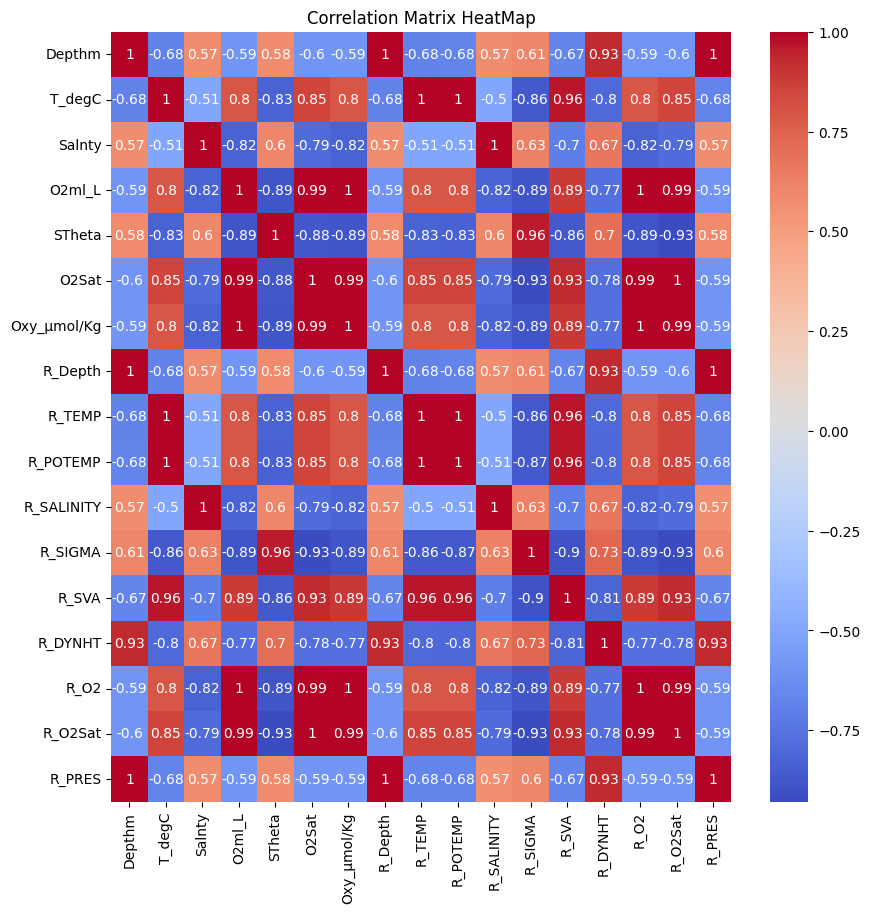

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',)
plt.title('Correlation Matrix HeatMap')
plt.show()

### Dropping columns based on correlation

The following were not considered for dropping because of known importance in determining Stability (E):
- Depthm
- T_degC
- Salnty
- STheta (potential density)

The following will be dropped, with the parenthesized number being the amount of columns it has high correlation (>|0.75|) with:
- Oxy_Mumol/kg (14)
- R_Depth (13)
- R_DYNHT (14)
- R_TEMP (12)
- R_POTEMP (12)
- R_SALINITY (7)
- R_SIGMA (11)
- R_SVA (12)
- R_O2 (14)
- R_O2Sat (14)
- O2ml_L (14)
- O2SAt (14)
- R_PRES (4)



Dropped columns explanations

'R_' columns:
- These columns are the recorded measurement columns. Not only are these redundrant to their equivalent measured columns, but they also had high correlation with multiple other columns. Most of the recorded measurement columns had high correlations with over 10 columns. The exception to this is 'R_PRES' which is recorded pressure; however, since the others are being dropped, using the recorded measurement of pressure would lack consistency when the columns kept are the measured columns and not the recorded measurement columns. The lack of information regarding where the recorded data came from is why those columns were dropped in favor of keeping the measured columns.

Oxygen columns:
- Due to the overall worry about redundancy that is raised by the correlation heat map. It was decided to try to drop columns based on high correlation and whether such feature is believed to be important or informative about the target variable, stability threshold. Each oxygen column had high correlations with 14 other columns. Thus, the columns were dropped.

In [ ]:
#dropping columns from bottle dataset as discussed above
corr_drop=['Oxy_µmol/Kg','R_Depth','R_DYNHT','R_TEMP','R_POTEMP','R_SALINITY','R_SIGMA','R_SVA','R_O2','R_O2Sat','O2Sat','O2ml_L','R_PRES']
bottle.drop(corr_drop,axis=1,inplace=True)
bottle.info() #checking that columns were dropped; from 20 columns to 7 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Cst_Cnt   864863 non-null  int64  
 1   Btl_Cnt   864863 non-null  int64  
 2   Sta_ID    864863 non-null  object 
 3   Depth_ID  864863 non-null  object 
 4   Depthm    864863 non-null  int64  
 5   T_degC    853900 non-null  float64
 6   Salnty    817509 non-null  float64
 7   STheta    812174 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 52.8+ MB


### Dropping identifying columns from bottle dataset

In [ ]:
#dropping id columns; Cst_Cnt retained to merge datasets
id_drop=['Btl_Cnt','Sta_ID','Depth_ID']
bottle.drop(id_drop,axis=1,inplace=True)
bottle.info() #7 to 4 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Cst_Cnt  864863 non-null  int64  
 1   Depthm   864863 non-null  int64  
 2   T_degC   853900 non-null  float64
 3   Salnty   817509 non-null  float64
 4   STheta   812174 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 33.0 MB


## Focus on Cast Dataset

In [ ]:
cols=[]
uni_count=[]
uni_perc=[]

#number of unique values for columns
for col in cast.columns:
  cols.append(col)
  unique=len(cast[col].unique())
  uni_count.append(unique)
  uni_perc.append(unique/len(cast)*100)

tb={
    'Columns':cols,
    'Unique Values':uni_count,
    'Unique %':uni_perc
}

tb=pd.DataFrame(tb)
tb.set_index('Columns',inplace=True)
tb

,Unique Values,Unique %
Columns,,
Cst_Cnt,34404,100.000000
Cruise_ID,645,1.874782
Cruise,376,1.092896
Cruz_Sta,30851,89.672712
DbSta_ID,2634,7.656087
Cast_ID,34404,100.000000
Sta_ID,2634,7.656087
Quarter,4,0.011627
Sta_Code,7,0.020346


In [ ]:
#keeping only columns of metadata relevant to Stability (E)
retain=['Cst_Cnt','Lat_Dec','Lon_Dec']
cast=cast[retain]
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cst_Cnt  34404 non-null  int64  
 1   Lat_Dec  34404 non-null  float64
 2   Lon_Dec  34404 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 806.5 KB


## Merging bottle and cast datasets
- remove unnecessary columns before doing so

method from cmaher: https://stackoverflow.com/questions/45068584/merge-two-csv-files-into-one-with-pandas-by-id

In [ ]:
df=pd.merge(bottle, cast, how='outer', on=['Cst_Cnt'])
df.info() #checking that datasets merged; expect 6 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Cst_Cnt  864863 non-null  int64  
 1   Depthm   864863 non-null  int64  
 2   T_degC   853900 non-null  float64
 3   Salnty   817509 non-null  float64
 4   STheta   812174 non-null  float64
 5   Lat_Dec  864863 non-null  float64
 6   Lon_Dec  864863 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 46.2 MB


In [ ]:
df.head()

,Cst_Cnt,Depthm,T_degC,Salnty,STheta,Lat_Dec,Lon_Dec
0,1,0,10.50,33.440,25.649,38.833333,-124.083333
1,1,8,10.46,33.440,25.656,38.833333,-124.083333
2,1,10,10.46,33.437,25.654,38.833333,-124.083333
3,1,19,10.45,33.420,25.643,38.833333,-124.083333
4,1,20,10.45,33.421,25.643,38.833333,-124.083333


## Dealing with NA Values
- Due to how small the percentage NA values make up of the whole dataset, NA values were removed.

In [ ]:
#checking number of NA values
df.isnull().sum()

Cst_Cnt        0
Depthm         0
T_degC     10963
Salnty     47354
STheta     52689
Lat_Dec        0
Lon_Dec        0
dtype: int64

In [ ]:
#checking NA values as percentages
print(f'NA values as % of whole dataset')
df.isnull().sum()/len(df)*100

NA values as % of whole dataset


Cst_Cnt    0.000000
Depthm     0.000000
T_degC     1.267600
Salnty     5.475318
STheta     6.092179
Lat_Dec    0.000000
Lon_Dec    0.000000
dtype: float64

In [ ]:
#dropping NA values
df=df.dropna()
df.isnull().sum() #checking that NA values were dropped

Cst_Cnt    0
Depthm     0
T_degC     0
Salnty     0
STheta     0
Lat_Dec    0
Lon_Dec    0
dtype: int64

In [ ]:
#checking shape; seeing how many datapoints are left
df.shape

(812174, 7)

In [ ]:
#creating new csv file for ease of rerunning code without rerunning preceding preprocessing
df.to_csv('pre_outliers_df.csv',index=False)

## Returning to Outliers
- 5/95 percentile replacement

In [ ]:
#run if reopening ipynb file and do not want to go through all the preceding preprocessing
df=pd.read_csv('pre_outliers_df.csv')

In [ ]:
#checking .describe() table for reference later
df.describe()

,Cst_Cnt,Depthm,T_degC,Salnty,STheta,Lat_Dec,Lon_Dec
count,812174.000000,812174.000000,812174.000000,812174.000000,812174.000000,812174.000000,812174.000000
mean,17730.743314,222.434704,10.847904,33.842424,25.819394,31.800520,-120.199831
std,10079.691018,308.778427,4.221005,0.461567,1.167787,3.681479,4.088574
min,1.000000,0.000000,1.440000,28.431000,20.934000,18.416666,-164.083333
25%,9209.000000,47.000000,7.750000,33.490000,24.965000,29.850000,-122.406666
50%,17873.000000,125.000000,10.100000,33.869200,25.996000,32.340000,-120.135000
75%,26984.000000,300.000000,13.910000,34.198000,26.646000,33.743333,-117.858333
max,34404.000000,5351.000000,31.140000,37.034000,250.784000,47.916666,-105.966666


In [ ]:
#checking number of outliers again
count_outliers(df)

,Outliers,Outliers %
Columns,,
Cst_Cnt,0,0.000000
Depthm,47241,5.816611
T_degC,4352,0.535846
Salnty,3016,0.371349
STheta,550,0.067719
Lat_Dec,42158,5.190760
Lon_Dec,29605,3.645155


In [ ]:
#function to deal with outliers in a dataset
def fix_outliers(dataset,col_lst):
  for col in col_lst:
    q1=dataset[col].quantile(0.25)
    q3=dataset[col].quantile(0.75)
    IQR=q3-q1
    lower=q1-(1.5*IQR)
    upper=q3+(1.5*IQR)
    p5=dataset[col].quantile(0.05)
    p95=dataset[col].quantile(0.95)
    dataset.loc[dataset[col]<lower,col]=p5
    dataset.loc[dataset[col]>upper,col]=p95
  return dataset


In [ ]:
fix_lst=['T_degC','Salnty','STheta']
df=fix_outliers(df,fix_lst)

In [ ]:
#checking if outliers were addresed by looking at min/max values in .describe() table
df.describe()

,Cst_Cnt,Depthm,T_degC,Salnty,STheta,Lat_Dec,Lon_Dec
count,812174.000000,812174.000000,812174.000000,812174.000000,812174.000000,812174.000000,812174.000000
mean,17730.743314,222.434704,10.816090,33.841268,25.819039,31.800520,-120.199831
std,10079.691018,308.778427,4.136037,0.453329,1.003992,3.681479,4.088574
min,1.000000,0.000000,1.440000,32.429000,22.444000,18.416666,-164.083333
25%,9209.000000,47.000000,7.750000,33.490000,24.965000,29.850000,-122.406666
50%,17873.000000,125.000000,10.100000,33.869200,25.996000,32.340000,-120.135000
75%,26984.000000,300.000000,13.910000,34.198000,26.646000,33.743333,-117.858333
max,34404.000000,5351.000000,23.150000,35.260000,28.139000,47.916666,-105.966666


Reasons for why certain columns were not run through the fix_outlier() function:
- Cst_Cnt: ID column, no need to fix outliers for an id column. Column to be used for location blocking, or Lat_Dec/Lon_Dec used in combination instead.
- Depthm: Important column for stability, when it was run through the function, max depth went down to 700. Significant loss in data if Depthm is treated for outliers.
- Lat_Dec/Lon_Dec: Both columns are for location of where the data originates from, the concept of an outlier does not apply to this column due to the metadata quality.

Reason for certain columns having outliers replaced with 5/95th percentile:
- These three columns are measured columns, so outliers should be taken care of for purposes of ML.

## Longitude/Latitude Blocks

- 5 degree by 5 degree blocks
- 84 blocks total
- top left block is 0, bottom right block is 83

In [ ]:
#finding min/max of latitude decimal degrees
print(df['Lat_Dec'].min())
df['Lat_Dec'].max()

18.416666


47.916666

In [ ]:
#finding min/max of longitude decimal degrees
print(df['Lon_Dec'].min())
df['Lon_Dec'].max()

-164.083333


-105.966666

<ipython-input-105-ae3b93ecd48f>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


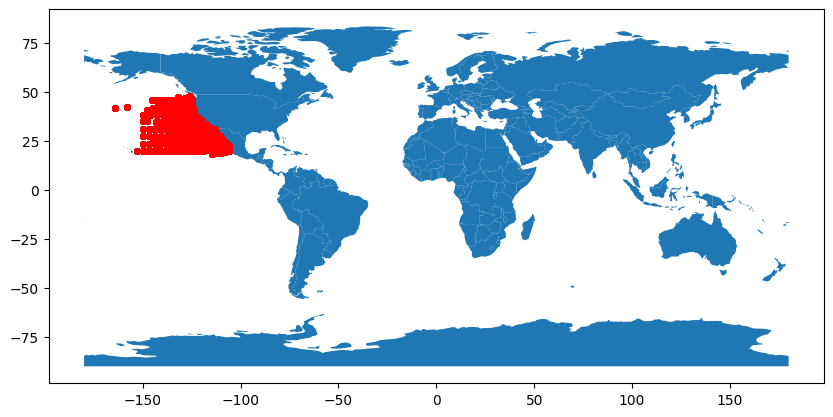

In [ ]:
#plotting datapoints onto a map

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['Lon_Dec'], df['Lat_Dec'])]
gdf = GeoDataFrame(df, geometry=geometry)

#this is a simple map that goes with geopandas naturalearth_lowres
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);